In [119]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [120]:
import matplotlib as plt
import seaborn as sns
import numpy as np

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter(action="ignore")

In [122]:
df = pd.read_csv('diabetes.csv')
df_raw = pd.read_csv('diabetes.csv')

Dataset ini memiliki 768 baris dan 9 kolom, dengan tidak ada nilai yang hilang (missing values). Tapi, ada beberapa hal yang perlu diperhatikan:

1. Nilai Nol di Kolom Medis
Kolom seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI memiliki nilai minimum 0, yang secara medis tidak masuk akal. Nilai-nilai ini kemungkinan besar adalah data yang hilang yang perlu ditangani.

2. Distribusi Nilai Outlier
Nilai maksimum pada kolom seperti Insulin (846) atau BMI (67.1) terlihat cukup tinggi dan mungkin perlu dicek apakah itu wajar.

In [123]:
# Define columns where 0 is considered as missing
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN for imputation
df = df.copy()
for col in columns_with_zeros:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: pd.NA if x == 0 else x)

# Impute missing values with median for specified columns
for col in columns_with_zeros:
    if col in df.columns:
        median_value = df[col].median(skipna=True)
        df[col].fillna(median_value, inplace=True)

In [124]:
# Define columns where 0 is considered as missing
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Apply KNN Imputer only to columns with missing values
data_imputed = df.copy()
data_imputed[columns_with_zeros] = knn_imputer.fit_transform(df[columns_with_zeros])

### **Base Model**

In [125]:
# Creating the Dependent Variable.

y = df["Outcome"]

# Creating Independent Variables.

X = df.drop("Outcome", axis=1)

# Splitting the Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [126]:
# Random Forest Classifier Model Training

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Prediction using Random Forest Classifier Model

y_pred = rf_model.predict(X_test)

print("RandomForestClassifier:")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

RandomForestClassifier:
Accuracy: 0.7835
Recall: 0.6528
Precision: 0.6528
F1: 0.6528
Auc: 0.7478


In [127]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(f"Accuracy: {round(accuracy_score(dt_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(dt_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(dt_pred, y_test), 4)}")
print(f"F1: {round(f1_score(dt_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(dt_pred, y_test), 4)}")

Decision Tree Classifier:
Accuracy: 0.7576
Recall: 0.6
Precision: 0.6667
F1: 0.6316
AUC: 0.7205


In [128]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_pred, y_test), 4)}")

Logistic Regression:
Accuracy: 0.8009
Recall: 0.697
Precision: 0.6389
F1: 0.6667
AUC: 0.7697


In [129]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")

K-Nearest Neighbors (KNN):
Accuracy: 0.7359
Recall: 0.5663
Precision: 0.6528
F1: 0.6065
AUC: 0.6987


### **Feature Engineering**

In [130]:
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

In [131]:
# BMI below 18.5 is underweight, between 18.5 and 24.9 is normal, between 24.9 and 29.9 is overweight and above 30 is obese

df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

In [132]:
# Converting Glucose Value to Categorical Variable

df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

In [133]:
# Creating a categorical variable by considering age and body mass index together 3 breakdowns were captured

df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

In [134]:
# Creating a categorical variable by considering age and glucose values together

df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

In [135]:
# Deriving a Categorical variable with Insulin Value.

def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return
    else:
        return "Abnormal"

df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)
df["NEW_GLUCOSE * INSULIN"] =df["Glucose"] * df["Insulin"]

In [136]:
# Attention to values with zero !!!

df["NEW_GLUCOSE * PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]

In [137]:
# Translating Column Names to Uppercase Letters.

df.columns = [col.upper() for col in df.columns]

In [138]:
# Analysis of Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [139]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


In [140]:
cat_cols

['NEW_AGE_CAT',
 'NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'OUTCOME',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [141]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE * INSULIN',
 'NEW_GLUCOSE * PREGNANCIES']

In [142]:
cat_but_car

[]

In [143]:
num_but_cat

['OUTCOME', 'NEW_BMI', 'NEW_GLUCOSE']

### **Encoding**

In [144]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [145]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [146]:
binary_cols

['NEW_AGE_CAT']

In [147]:
for col in binary_cols:
    df = label_encoder(df, col)

In [148]:
df.head(5)

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE * INSULIN,NEW_GLUCOSE * PREGNANCIES
0,6,148.0,72.0,35.0,125.0,33.6,0.6,50,1,1,Obese,Prediabetes,obesesenior,highsenior,None,18500.0,888.0
1,1,85.0,66.0,29.0,125.0,26.6,0.4,31,0,0,Overweight,Normal,obesemature,normalmature,None,10625.0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.7,32,1,0,Healthy,Prediabetes,obesemature,highmature,None,22875.0,1464.0
3,1,89.0,66.0,23.0,94.0,28.1,0.2,21,0,0,Overweight,Normal,obesemature,normalmature,None,8366.0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.3,33,1,0,Obese,Normal,obesemature,highmature,Abnormal,23016.0,0.0


In [149]:
# One-Hot Encoding
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]

In [150]:
cat_cols

['NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [151]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [152]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [153]:
df.head(5)

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_GLUCOSE * INSULIN,NEW_GLUCOSE * PREGNANCIES,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.6,50,1,1,18500.0,888.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
1,1,85.0,66.0,29.0,125.0,26.6,0.4,31,0,0,10625.0,85.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.7,32,1,0,22875.0,1464.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.2,21,0,0,8366.0,89.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.3,33,1,0,23016.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### **Modeling Again**

In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
import xgboost as xgb
from imblearn.over_sampling import BorderlineSMOTE

# Assuming your dataset is already loaded as `df`

# Creating the Dependent Variable
y = df["OUTCOME"]

# Creating Independent Variables
X = df.drop("OUTCOME", axis=1)

# Splitting the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# Apply Borderline-SMOTE to balance the dataset
smote = BorderlineSMOTE(random_state=17)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Building the pipeline with RandomForestClassifier and XGBoost
pipeline_rf = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),          # Handling missing values
    ('scaler', StandardScaler()),                   # Standardizing features
    ('model', RandomForestClassifier(random_state=17, class_weight='balanced'))  # Random Forest Classifier with class balancing
])

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200], 
    'model__max_depth': [None, 10, 20], 
    'model__min_samples_split': [2, 5], 
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['auto', 'sqrt'],
    'model__class_weight': ['balanced', None]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_resampled, y_resampled)

# Best Parameters for Random Forest
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")

# Use the best model found by GridSearchCV
best_model_rf = grid_search_rf.best_estimator_

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 0.9, 1],
    'model__colsample_bytree': [0.8, 0.9, 1]
}

# Building the pipeline with XGBoost
pipeline_xgb = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('model', xgb.XGBClassifier(scale_pos_weight=1, random_state=17))
])

# Perform Grid Search for XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_resampled, y_resampled)

# Best Parameters for XGBoost
print(f"Best XGBoost Parameters: {grid_search_xgb.best_params_}")

# Use the best model found by GridSearchCV
best_model_xgb = grid_search_xgb.best_estimator_

# Combine Random Forest and XGBoost in a VotingClassifier
voting_model = VotingClassifier(estimators=[('rf', best_model_rf), ('xgb', best_model_xgb)], voting='soft')

# Build a pipeline with VotingClassifier
pipeline_voting = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('model', voting_model)
])

# Train the VotingClassifier model
pipeline_voting.fit(X_resampled, y_resampled)

# Adjusting the decision threshold for better class 1 sensitivity
threshold = 0.3
y_probs_voting = pipeline_voting.predict_proba(X_test)[:, 1]
y_pred_adjusted_voting = (y_probs_voting >= threshold).astype(int)

# Evaluate VotingClassifier
print("Voting Classifier Classification Report (adjusted threshold):\n", classification_report(y_test, y_pred_adjusted_voting))

# Evaluating the models individually
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_adjusted_rf = (y_probs_rf >= threshold).astype(int)
print("Random Forest Classification Report (adjusted threshold):\n", classification_report(y_test, y_pred_adjusted_rf))

y_probs_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
y_pred_adjusted_xgb = (y_probs_xgb >= threshold).astype(int)
print("XGBoost Classification Report (adjusted threshold):\n", classification_report(y_test, y_pred_adjusted_xgb))


Best Random Forest Parameters: {'model__class_weight': 'balanced', 'model__max_depth': None, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best XGBoost Parameters: {'model__colsample_bytree': 0.9, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 0.8}
Voting Classifier Classification Report (adjusted threshold):
               precision    recall  f1-score   support

           0       0.88      0.69      0.77       150
           1       0.59      0.83      0.69        81

    accuracy                           0.74       231
   macro avg       0.73      0.76      0.73       231
weighted avg       0.78      0.74      0.74       231

Random Forest Classification Report (adjusted threshold):
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       150
           1       0.57      0.84      0.68        81

    accurac

### Analisis Model Klasifikasi Diabetes

Pada model klasifikasi diabetes ini, kita memfokuskan pada pemilihan model terbaik untuk memprediksi apakah seseorang mengidap diabetes (kelas 1) atau tidak (kelas 0). Berdasarkan hasil evaluasi performa model menggunakan **Random Forest**, **XGBoost**, dan **Voting Classifier**, berikut adalah analisisnya:

#### 1. **Recall untuk Kelas 1 (Diabetes)**:
- **Random Forest** memiliki **recall tertinggi** sebesar **84%**, yang berarti model ini dapat mengidentifikasi **lebih banyak kasus diabetes** dibandingkan model lainnya. 
- Dalam konteks medis, **false negative** (kasus yang terlewat) bisa sangat berisiko, karena seseorang yang sebenarnya mengidap diabetes tidak akan mendapatkan perawatan yang diperlukan.
- **Prioritas recall** sangat penting di sini karena kita ingin meminimalkan orang yang benar-benar mengidap diabetes tetapi tidak terdiagnosis.

#### 2. **Precision untuk Kelas 1**:
- Precision untuk **Random Forest** lebih rendah (57%) dibandingkan dengan **XGBoost** (59%) dan **Voting Classifier** (59%).
- **Precision** mengukur berapa banyak prediksi diabetes yang benar dari seluruh prediksi diabetes yang dibuat oleh model. Precision yang lebih rendah berarti lebih banyak **false positive** (menduga seseorang mengidap diabetes padahal tidak).
- Meskipun precision lebih rendah, dalam kasus ini **recall** lebih penting daripada precision. Ini karena mengidentifikasi sebanyak mungkin penderita diabetes (meskipun ada beberapa kesalahan dalam diagnosis) lebih penting daripada melewatkan diagnosis.

#### 3. **Performa Keseluruhan**:
- **F1-score** untuk kelas 1 hampir sama antara **Random Forest** (68%) dan **XGBoost** (68%), yang menunjukkan bahwa meskipun Random Forest sedikit lebih unggul dalam recall, kedua model ini memiliki keseimbangan antara recall dan precision yang hampir sama.
- Namun, karena Random Forest memiliki **recall tertinggi**, maka model ini menjadi pilihan terbaik dalam hal **mengidentifikasi lebih banyak kasus diabetes**.

### Pertimbangan dalam Konteks Medis:
- Dalam kasus **diabetes**, lebih baik untuk **memprioritaskan recall** daripada precision. Ini karena lebih baik memiliki beberapa **false positive** (mendeteksi diabetes pada orang yang sebenarnya tidak mengidapnya) daripada **melewatkan penderita diabetes** yang bisa berisiko.
- **Random Forest** dengan recall tinggi (84%) adalah pilihan yang lebih baik untuk memastikan sebanyak mungkin penderita diabetes terdeteksi dan mendapatkan penanganan yang tepat.

### Kesimpulan:
- **Pemilihan Random Forest** sudah tepat jika fokus utama adalah **meningkatkan recall** untuk mendeteksi lebih banyak penderita diabetes.
- Meskipun ada penurunan di **precision**, **recall** yang lebih tinggi jauh lebih krusial dalam konteks medis.
- **Perbaikan lebih lanjut** bisa dilakukan untuk meningkatkan precision jika diperlukan, misalnya dengan tuning model lebih lanjut atau mengubah threshold keputusan.



### **Model to Pickle to Deploy on Stream Lit**

In [160]:
import pickle

# Save the best Random Forest model
with open('best_random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model_rf, f)


### **Shap Check From Best Model** 

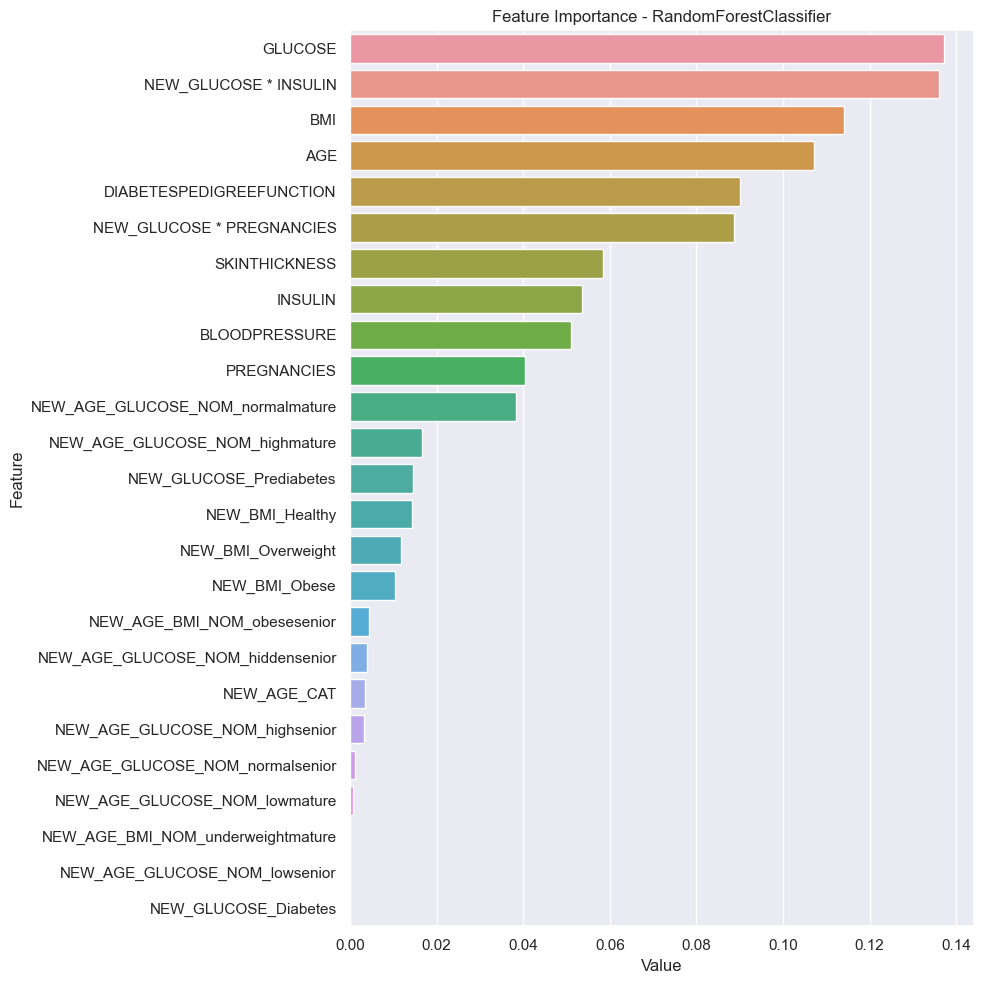

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_importance(model, features, num=len(X), save=False):
    # Extract the RandomForest model from the pipeline
    rf_model = model.named_steps['model']
    
    # Get feature importances from the RandomForest model
    feature_imp = pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': features.columns})
    
    # Plot feature importances
    plt.figure(figsize=(10, 10))  # Define the figure size
    sns.set(font_scale=1)  # Set the font scale for readability
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])  # Plot
    plt.title(f'Feature Importance - {rf_model.__class__.__name__}')
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot
    
    # Optionally save the plot
    if save:
        plt.savefig('importances.png')

# Assuming you have already trained the `best_model_rf` pipeline, call the function
plot_importance(best_model_rf, X)


### **Checking Wrong Predictions (Manually)**

##### **Domain Knowledge**

##### Analisis Fitur untuk Prediksi Diabetes

Dataset ini mencakup beberapa fitur yang berhubungan dengan risiko diabetes, dan masing-masing fitur dapat memberikan wawasan tentang kemungkinan seseorang menderita diabetes. Berikut adalah penjelasan mengenai fitur-fitur yang ada dalam dataset ini dan hubungannya dengan risiko diabetes.

##### 1. **Pregnancies (Jumlah Kehamilan)**
   - **Faktor Risiko**: Jumlah kehamilan yang tinggi, terutama yang terkait dengan gestational diabetes (diabetes yang berkembang selama kehamilan), dapat meningkatkan risiko diabetes tipe 2 di kemudian hari.
   - **Pengaruh**: Meskipun tidak langsung berhubungan dengan diagnosis diabetes tipe 2, jumlah kehamilan yang lebih tinggi dapat memberikan petunjuk tentang potensi risiko diabetes di masa depan.

##### 2. **Glucose (Kadar Glukosa Darah)**
   - **Pengaruh Besar**: Kadar glukosa darah adalah indikator utama diabetes. Sebagai contoh:
     - **Kadar glukosa puasa 100-125 mg/dl** menunjukkan kondisi pradiabetes.
     - **Kadar glukosa > 126 mg/dl** pada dua kali pemeriksaan menunjukkan diabetes tipe 2.
     - Kadar glukosa darah yang lebih tinggi, terutama pada tes toleransi glukosa (seperti 2-hour plasma glucose concentration), sering kali menunjukkan gangguan metabolisme glukosa, yang mengarah ke diabetes.
   - **Diabetes**: Jika seseorang memiliki kadar glukosa darah yang lebih tinggi secara konsisten, ini adalah indikasi yang sangat kuat dari diabetes.

##### 3. **Blood Pressure (Tekanan Darah)**
   - **Pengaruh**: Tekanan darah tinggi (hipertensi) sangat sering terjadi pada penderita diabetes. Hipertensi dapat memperburuk komplikasi diabetes, seperti penyakit jantung atau kerusakan ginjal.
   - **Standar**:
     - Tekanan darah lebih dari **140/90 mm Hg** dianggap sebagai hipertensi dan merupakan faktor risiko untuk diabetes tipe 2.

##### 4. **Skin Thickness (Ketebalan Kulit)**
   - **Pengaruh**: Ketebalan kulit, terutama di sekitar area lengan, dapat berkaitan dengan resistensi insulin. Meskipun tidak sekuat faktor lainnya, ini bisa menjadi indikator untuk peningkatan lemak tubuh yang berkaitan dengan diabetes tipe 2.

##### 5. **Insulin (Kadar Insulin Serum)**
   - **Pengaruh**: Kadar insulin yang sangat tinggi dapat menunjukkan bahwa tubuh sedang berusaha keras untuk mengatasi resistensi insulin, yang merupakan ciri khas dari diabetes tipe 2. 
   - **Tingkat Normal**: Biasanya, kadar insulin serum yang rendah bisa menunjukkan bahwa tubuh kekurangan insulin, sementara kadar insulin yang sangat tinggi mengindikasikan masalah dalam pengaturan gula darah.

##### 6. **Diabetes Pedigree Function (Fungsi Keturunan Diabetes)**
   - **Pengaruh Genetik**: Ini mengukur risiko seseorang berdasarkan riwayat keluarga mereka. Jika seseorang memiliki riwayat keluarga dengan diabetes, maka risiko mereka untuk mengembangkan diabetes lebih tinggi.
   - **Tingkat Risiko**: Jika nilai Diabetes Pedigree Function lebih tinggi, maka seseorang memiliki risiko lebih besar untuk mengidap diabetes, terutama jika ada anggota keluarga yang mengidap diabetes tipe 2.

##### 7. **BMI (Body Mass Index)**
   - **Pengaruh**: Obesitas adalah salah satu faktor risiko terbesar untuk diabetes tipe 2. BMI yang lebih tinggi berhubungan dengan peningkatan resistensi insulin.
   - **Kriteria**:
     - **BMI ≥ 30** menunjukkan obesitas, yang merupakan faktor risiko besar untuk diabetes tipe 2.
     - **BMI 25-29.9** menunjukkan kelebihan berat badan, yang juga dapat meningkatkan risiko diabetes.
     - **BMI < 25** dianggap sehat, namun risiko diabetes tetap ada jika ada faktor risiko lainnya.

##### 8. **Age (Usia)**
   - **Pengaruh**: Semakin tua usia seseorang, semakin tinggi risiko mengembangkan diabetes, terutama setelah usia 45 tahun.
   - **Tren Umum**: Diabetes tipe 2 lebih umum pada orang yang lebih tua, tetapi dengan meningkatnya obesitas di kalangan anak muda, diabetes tipe 2 sekarang semakin banyak ditemukan pada individu yang lebih muda.

##### **Kesimpulan**
Secara keseluruhan, beberapa fitur seperti **Glucose**, **BMI**, **Age**, dan **Blood Pressure** adalah faktor yang sangat penting dalam mendiagnosis diabetes. Glukosa darah tinggi adalah indikator paling signifikan dari diabetes. Jika seseorang memiliki kadar glukosa darah yang tinggi, ditambah dengan faktor-faktor lain seperti obesitas (BMI tinggi), hipertensi, dan riwayat keluarga, maka mereka berisiko lebih besar terkena diabetes.

##### **Tingkat Risiko Diabetes Berdasarkan Data:**
- **Glucose**: > 126 mg/dL (diabetes), 100-125 mg/dL (pradiabetes)
- **BMI**: > 30 (obesitas, risiko diabetes lebih tinggi)
- **Blood Pressure**: > 140/90 mm Hg (hipertensi, meningkatkan risiko diabetes)
- **Age**: Lebih dari 45 tahun (risiko meningkat seiring bertambahnya usia)


In [193]:
# Get the predictions from the Random Forest model
y_pred_rf = best_model_rf.predict(X_test)

# Identify the wrong predictions (True positives should be class 1, false positives are class 0, etc.)
wrong_predictions = X_test.copy()
wrong_predictions['Actual'] = y_test
wrong_predictions['Predicted'] = y_pred_rf

# Find rows where the model's prediction was wrong
wrong_predictions = wrong_predictions[wrong_predictions['Actual'] != wrong_predictions['Predicted']]

# For class 1, look for wrong predictions where the actual value is 1 but the predicted value is 0
wrong_class_1_predictions = wrong_predictions[(wrong_predictions['Actual'] == 1) & (wrong_predictions['Predicted'] == 0)]

# Define a function to check if a row meets the domain knowledge criteria
def check_domain_knowledge(row):
    glucose_condition = row['GLUCOSE'] > 126
    bmi_condition = row['BMI'] > 30
    blood_pressure_condition = row['BLOODPRESSURE'] > 140  # Assuming single value for simplicity
    age_condition = row['AGE'] > 45
    
    # Return True if the row meets any of the domain knowledge criteria
    return glucose_condition or bmi_condition or blood_pressure_condition or age_condition

# Apply the function to the 'wrong_class_1_predictions' DataFrame to identify which rows meet the conditions
wrong_class_1_predictions['meets_domain_knowledge'] = wrong_class_1_predictions.apply(check_domain_knowledge, axis=1)

# Count how many rows meet the domain knowledge conditions
domain_knowledge_met = wrong_class_1_predictions[wrong_class_1_predictions['meets_domain_knowledge'] == True]
domain_knowledge_not_met = wrong_class_1_predictions[wrong_class_1_predictions['meets_domain_knowledge'] == False]

# Hitung total data yang salah prediksi
total_wrong_predictions = len(wrong_class_1_predictions)

# Hitung jumlah data yang memenuhi dan tidak memenuhi domain knowledge
domain_knowledge_met_count = len(domain_knowledge_met)
domain_knowledge_not_met_count = len(domain_knowledge_not_met)

# Hitung persentase
domain_knowledge_met_percentage = (domain_knowledge_met_count / total_wrong_predictions) * 100
domain_knowledge_not_met_percentage = (domain_knowledge_not_met_count / total_wrong_predictions) * 100

# Print hasilnya
print(f"Total data yang salah diprediksi: {total_wrong_predictions} data")
print(f"Persentase data yang memenuhi domain knowledge: {domain_knowledge_met_percentage:.2f}%")
print(f"Persentase data yang tidak memenuhi domain knowledge: {domain_knowledge_not_met_percentage:.2f}%")

Total data yang salah diprediksi: 23 data
Persentase data yang memenuhi domain knowledge: 95.65%
Persentase data yang tidak memenuhi domain knowledge: 4.35%


### **Analisis Prediksi Salah Model dengan Domain Knowledge**

Dalam analisis ini, kita memeriksa 23 prediksi salah dari model Random Forest yang memprediksi **class 1 (diabetes)**, namun salah memprediksi sebagai **class 0 (tidak diabetes)**. Berdasarkan **domain knowledge** mengenai faktor risiko diabetes, kita mencoba untuk mengidentifikasi apakah kondisi pada data yang salah diprediksi tersebut memenuhi kriteria yang biasanya digunakan untuk mendeteksi risiko diabetes.

#### **Domain Knowledge untuk Diabetes**
Berdasarkan data dan pengetahuan medis terkait diabetes, faktor-faktor berikut sering kali berhubungan dengan risiko diabetes:
1. **Glucose**: Kadar glukosa darah > 126 mg/dL (diabetes), 100-125 mg/dL (pradiabetes).
2. **BMI**: > 30 menunjukkan obesitas, yang meningkatkan risiko diabetes.
3. **Blood Pressure**: Tekanan darah > 140/90 mm Hg, berhubungan dengan hipertensi yang meningkatkan risiko diabetes.
4. **Age**: Usia > 45 tahun menunjukkan peningkatan risiko diabetes.

#### **Temuan**
Dari **23 prediksi salah**, berikut adalah temuan analisis terhadap data yang salah diprediksi sebagai class 0 (tidak diabetes):

- **22 dari 23 data** memenuhi kriteria risiko diabetes berdasarkan **domain knowledge**. Artinya, meskipun model memprediksi mereka sebagai tidak diabetes (class 0), berdasarkan kriteria faktor risiko, mereka seharusnya memiliki kemungkinan lebih tinggi untuk mengidap diabetes.
- **1 data** tidak memenuhi kriteria domain knowledge yang dapat digunakan untuk mendeteksi diabetes, yang berarti data tersebut mungkin tidak menunjukkan faktor risiko yang signifikan.

#### **Kesimpulan**
Model Random Forest yang digunakan menunjukkan tingkat kesalahan prediksi yang tinggi untuk individu-individu dengan kondisi risiko diabetes yang jelas. Meskipun model memberikan prediksi yang salah, mayoritas data yang salah diprediksi masih termasuk dalam kelompok berisiko tinggi untuk diabetes. Oleh karena itu, meskipun model memprediksi beberapa individu sebagai tidak berisiko, mereka sebenarnya berada dalam kategori risiko tinggi berdasarkan faktor-faktor yang sudah diketahui dalam domain medis.

Ke depan, ini menunjukkan bahwa model mungkin perlu lebih sensitif dalam mengidentifikasi individu dengan faktor risiko diabetes, dan mungkin ada peluang untuk meningkatkan model agar lebih memadai dalam prediksi risiko diabetes berdasarkan kriteria tersebut.


In [195]:
import joblib

# Simpan model Random Forest
joblib.dump(best_model_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']